In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
spark = SparkSession.builder.appName("Top10_Cust_Vis").getOrCreate()

In [3]:
query= "(SELECT a.FIRST_NAME, a.LAST_NAME, SUM(b.transaction_value) `total_transaction` FROM cdw_sapp_customer a INNER JOIN \
cdw_sapp_credit_card b WHERE a.ssn = b.cust_ssn group BY a.first_name, a.last_name ORDER BY  `total_transaction` limit 10) as cust"

df_top10 = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

df_top10.show()

+----------+----------+-----------------+
|FIRST_NAME| LAST_NAME|total_transaction|
+----------+----------+-----------------+
|     Lydia|      Haas|             2.15|
|    Ernest|    Kaiser|            10.41|
|  Chadwick|  Delacruz|            61.67|
|     Nancy|   Medrano|            73.08|
|   Hillary|      Daly|            73.59|
|    Miquel|Harrington|            74.59|
|  Ashleigh|   Holland|            78.52|
|      Hugo|    Harris|            86.76|
|    Sydney|    Ludwig|            88.29|
|    Foster|    Manley|            90.94|
+----------+----------+-----------------+



In [4]:
#Convert spark dataframe to pandas dataframe
p_df = df_top10.toPandas()
p_df.set_index(["FIRST_NAME", "LAST_NAME"], inplace = True)
p_df

,,total_transaction
FIRST_NAME,LAST_NAME,
Lydia,Haas,2.15
Ernest,Kaiser,10.41
Chadwick,Delacruz,61.67
Nancy,Medrano,73.08
Hillary,Daly,73.59
Miquel,Harrington,74.59
Ashleigh,Holland,78.52
Hugo,Harris,86.76
Sydney,Ludwig,88.29


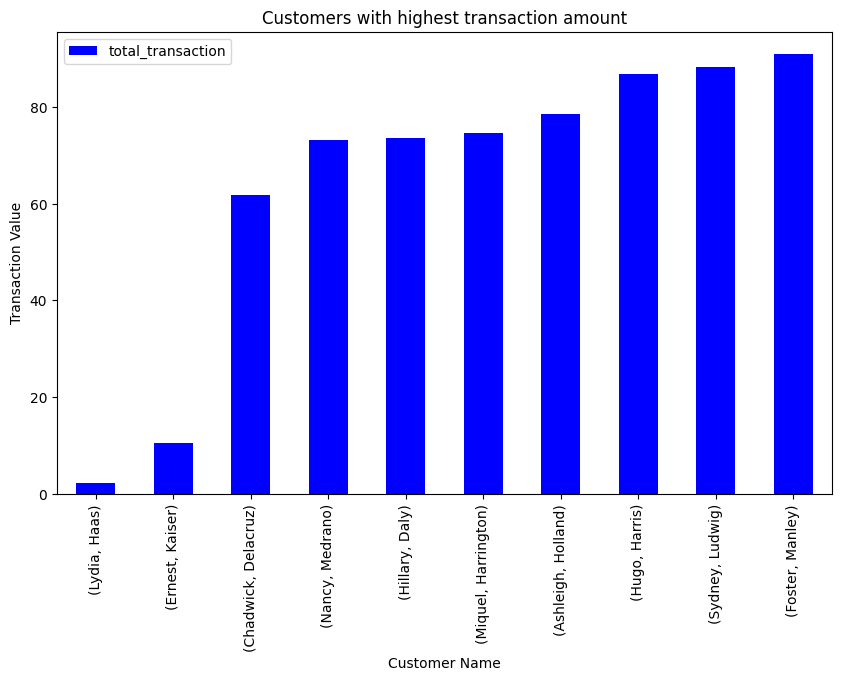

In [5]:
p_df.plot(kind='bar', figsize=(10, 6), rot=90, color = 'blue')
plt.xlabel('Customer Name')
plt.ylabel('Transaction Value')
plt.title('Customers with highest transaction amount')

plt.show()

In [6]:
spark.stop()